In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

sns.set(rc={'figure.figsize':(25,10)})


In [3]:
# import sample name mapping to date and location 

fname_sample_names = "../../resources/timeline.tsv"

df_mapping = pd.read_csv(fname_sample_names, sep="\t")
df_mapping['my_sample_name'] = df_mapping["sample"] + "/"+df_mapping["batch"]

In [4]:
# import mutations of interest

fname_mut = "../../results/mutations_of_interest.csv"

df = pd.read_csv(fname_mut)
df = df.drop(["Unnamed: 0.1", "index", "Unnamed: 0", "INFO", "INFO_list"], axis=1)

In [5]:
df["mutation_id"] = df["POS"].astype('str')+df["ALT"]
df.loc[df["IsSynonymous"]==0,"mutation_id"] = df["mutation_id"]+" *"

df["mutation_id"] = df["mutation_id"]+ " -- "+df['RefAminoAcid']+" > "+df['AltAminoAcid']

df["sample_name"] = df["sample"].str.split("/").str[0]

In [6]:
# map sample name to location and date 

def f_sample2location(row):
    samplename = row['sample']
    
    location = df_mapping[df_mapping['my_sample_name']==samplename]['location'].values[0]    
    return location

def f_sample2date(row):
    samplename = row['sample']
    date = df_mapping[df_mapping['my_sample_name']==samplename]['date'].values[0]
    
    return date

In [7]:
df['location'] = df.apply(f_sample2location, axis=1)
df['date'] = df.apply(f_sample2date, axis=1)

In [8]:
df.columns

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'sample', 'Fvar',
       'Rvar', 'Ftot', 'Rtot', 'Pval', 'Qval', 'RefCodon', 'AltCodon',
       'RefAminoAcid', 'AltAminoAcid', 'CodonPosition', 'SNPCodonPosition',
       'AminoAcidChange', 'IsSynonymous', 'IsTransition', 'IsGenic',
       'IsPseudo', 'LocusTag', 'Gene', 'Note', 'Inference', 'Product',
       'ProteinID', 'Comments', 'VariantType', 'FeatureType', 'Freq1', 'Post1',
       'mutation_id', 'sample_name', 'location', 'date'],
      dtype='object')

In [9]:
df_pivot = df.pivot_table(values='Freq1',
                           index=["date", "location"], 
                           columns='mutation_id', 
                          )

In [10]:
from itertools import groupby

def add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .2], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)
    
def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    xpos = -.2
    scale = 1./df.index.size
    for level in range(df.index.nlevels):
        pos = df.index.size
        for label, rpos in label_len(df.index,level):
            add_line(ax, pos*scale, xpos)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale
            ax.text(xpos+.1, lypos, label, ha='center', transform=ax.transAxes) 
        add_line(ax, pos*scale , xpos)
        xpos -= .2

ValueError: zero-size array to reduction operation fmin which has no identity

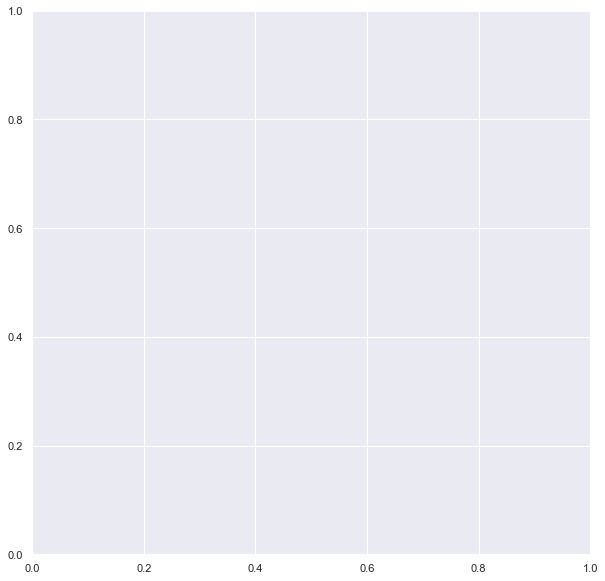

In [11]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(111)
sns.heatmap(df_pivot, 
                cmap="RdPu",
                linewidths=2,)

#Below 3 lines remove default labels
labels = ['' for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.set_ylabel('')

label_group_bar_table(ax, df_pivot)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.xlabel("")
plt.title("Mutation frequency", fontsize=20)
plt.suptitle("* = non-synonymous mutations", x= 0.7,y=-0.01, fontsize=10)
plt.tight_layout()
plt.savefig("mutation_calls_on_potential_drug_resistance_sites.pdf")

In [95]:
df_pivot_postierior = df.pivot_table(values='Post1',
                           index='sample', 
                           columns='mutation_id')

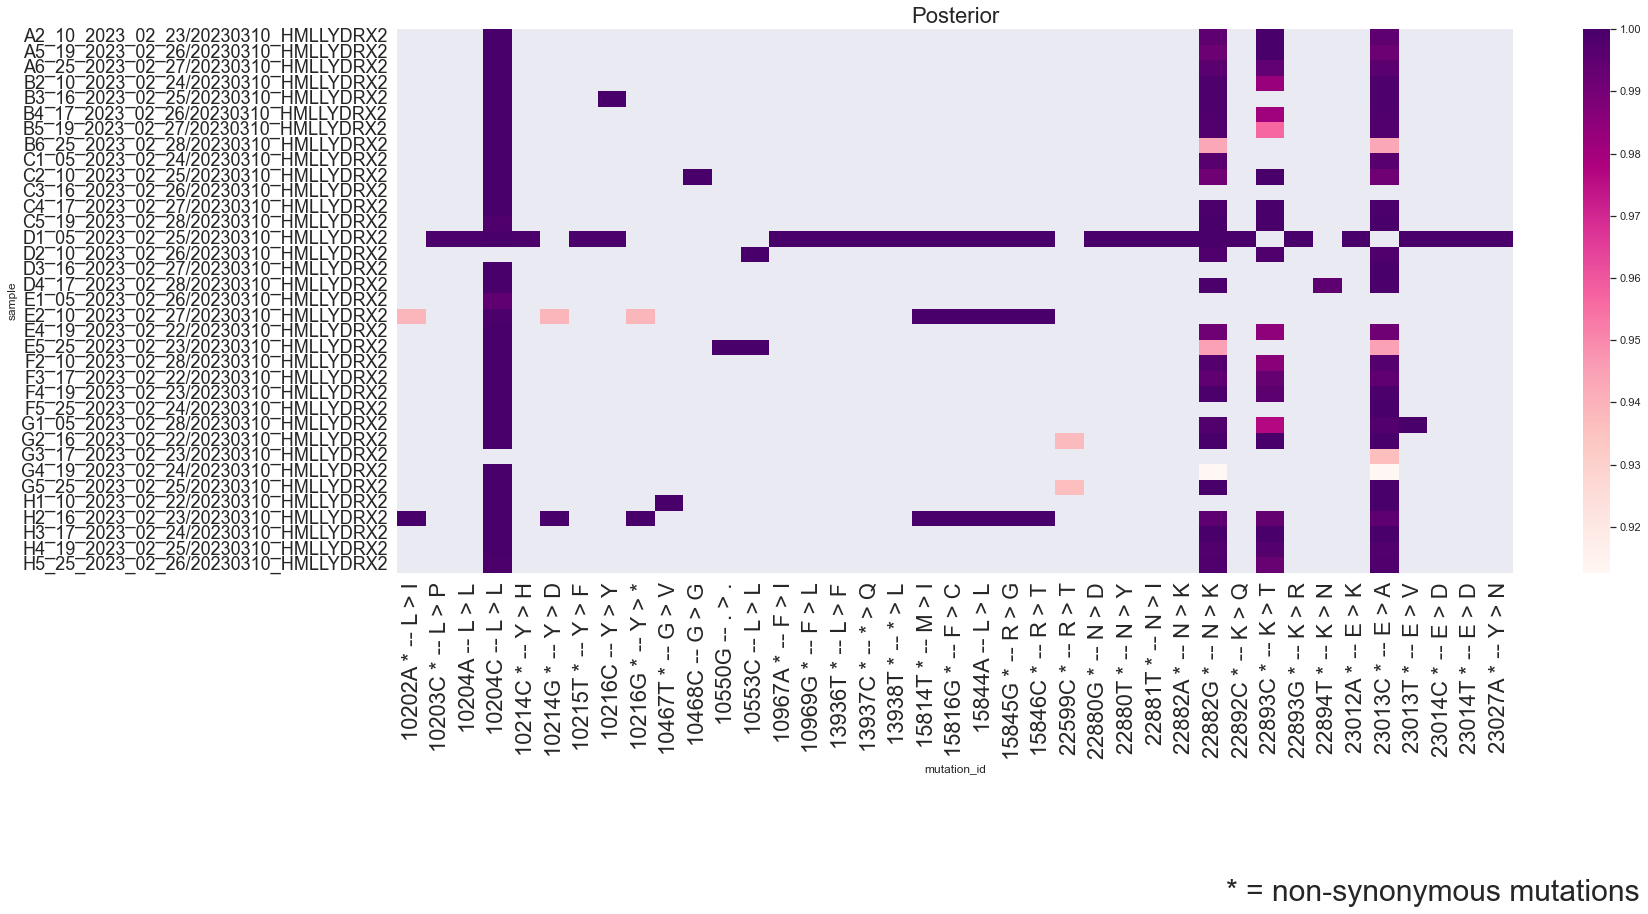

In [96]:
g = sns.heatmap(df_pivot_postierior, cmap="RdPu")
plt.xticks(rotation=90, fontsize=22)
plt.yticks(fontsize=18)
plt.title("Posterior", fontsize=22)
plt.suptitle("* = non-synonymous mutations", x= 0.7,y=-0.3, fontsize=30)

plt.show()

In [ ]:
g = sns.heatmap(df_pivot, 
                cmap="RdPu",
                linewidths=2,)
plt.xticks(rotation=90, fontsize=22)
plt.yticks(fontsize=18)
g.set(xlabel="", ylabel="")
plt.title("Mutation frequency", fontsize=40)
plt.suptitle("* = non-synonymous mutations", x= 0.7,y=-0.3, fontsize=30)
plt.show()
plt.savefig("mutation_calls_on_potential_drug_resistance_sites.pdf")